In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ticker = yf.Ticker("INFY")
data=ticker.history(start="2022-01-01",end="2024-12-31",interval="1d")
data = data.dropna()
data=data.drop(['Dividends','Stock Splits'],axis=1)

print(data.head(30))

                                Open       High        Low      Close  \
Date                                                                    
2022-01-03 00:00:00-05:00  23.443215  23.581715  23.221617  23.323183   
2022-01-04 00:00:00-05:00  23.313948  23.424747  23.064650  23.184683   
2022-01-05 00:00:00-05:00  22.935389  23.009255  22.390627  22.436792   
2022-01-06 00:00:00-05:00  22.344461  22.612225  22.132095  22.261362   
2022-01-07 00:00:00-05:00  22.362927  22.501427  22.132095  22.344461   
2022-01-10 00:00:00-05:00  22.769190  22.879990  22.556826  22.870756   
2022-01-11 00:00:00-05:00  22.972321  23.138519  22.769190  23.101587   
2022-01-12 00:00:00-05:00  24.144943  24.366541  23.554016  23.775614   
2022-01-13 00:00:00-05:00  23.766380  23.803314  23.517082  23.637115   
2022-01-14 00:00:00-05:00  23.747915  24.274212  23.618650  24.191113   
2022-01-18 00:00:00-05:00  23.738682  23.794083  23.470919  23.554018   
2022-01-19 00:00:00-05:00  23.064653  23.129286  22

,Open,High,Low,Close,MovingA,SMA,Upper,Lower
Date,,,,,,,,
2022-02-09 00:00:00-05:00,21.393436,21.661200,21.328804,21.615034,21.168540,0.492866,22.154272,20.182808
2022-02-10 00:00:00-05:00,21.282635,21.485767,21.116438,21.181070,21.137543,0.477208,22.091959,20.183127
2022-02-11 00:00:00-05:00,20.977938,21.024105,20.507042,20.562443,21.093355,0.499263,22.091882,20.094828
2022-02-14 00:00:00-05:00,20.313147,20.553211,20.211580,20.488579,21.074229,0.516634,22.107497,20.040961
2022-02-15 00:00:00-05:00,21.033340,21.190306,20.913307,21.134905,21.107205,0.504580,22.116366,20.098045
...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,23.050714,0.296225,23.643165,22.458264
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,23.068571,0.270076,23.608723,22.528420
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,23.052857,0.287587,23.628031,22.477684


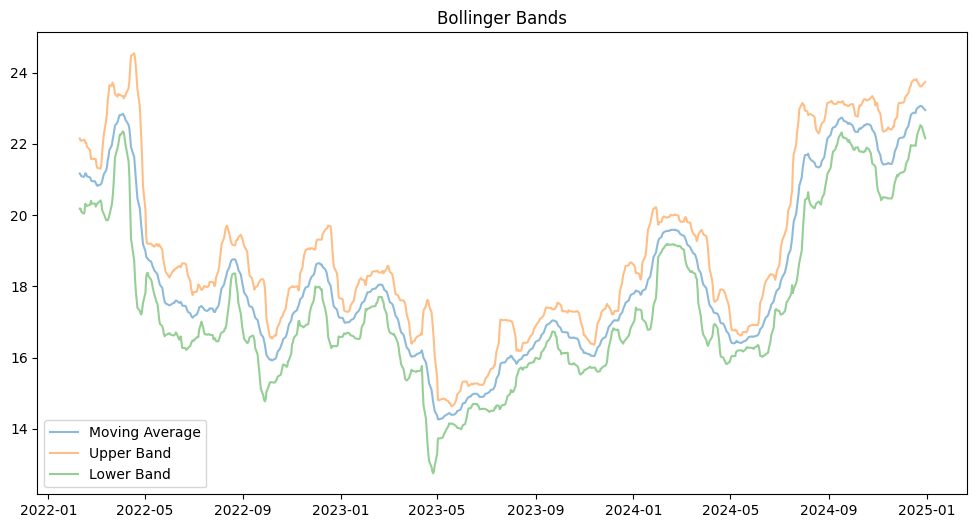

In [18]:
#Bollinger Bands-> 2 Standard deviations used and 14 day moving average used
def bollinger_bands(data):




    data['MovingA'] = data['Close'].rolling(window=14).mean()
    data['SMA'] = data['Close'].rolling(window=14).std(ddof=0)
    data['Upper'] = data['MovingA'] + (data['SMA'] * 2)
    data['Lower'] = data['MovingA'] - (data['SMA'] * 2)

    data.dropna(inplace=True)




    plt.figure(figsize=(12,6))

    plt.plot(data['MovingA'],label='Moving Average',alpha=0.5)
    plt.plot(data['Upper'],label='Upper Band',alpha=0.5)
    plt.plot(data['Lower'],label='Lower Band',alpha=0.5)
    plt.legend()
    plt.title('Bollinger Bands')

    return data






bollinger_bands(data)




In [20]:
#RSI Calculated for a time period of 14 days
def relative_strength_index(data):

    data['Change'] = data['Close'].diff()
    gain = data['Change'].where(data['Change'] > 0, 0)
    loss = -data['Change'].where(data['Change'] < 0, 0)
    gainavg = gain.ewm(alpha=1/14,min_periods=14).mean()
    lossavg = loss.ewm(alpha=1/14,min_periods=14).mean()
    rs = gainavg / lossavg
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    data.dropna(inplace=True)


    return data









relative_strength_index(data)


,Open,High,Low,Close,MovingA,SMA,Upper,Lower,Change,RSI
Date,,,,,,,,,,
2022-03-01 00:00:00-05:00,20.673243,20.774809,20.350080,20.460878,20.903414,0.333192,21.569799,20.237030,-0.276997,38.451753
2022-03-02 00:00:00-05:00,20.507044,21.033340,20.470112,20.857908,20.849334,0.268456,21.386246,20.312422,0.397030,45.862886
2022-03-03 00:00:00-05:00,21.097973,21.181072,20.710176,20.793276,20.821634,0.252320,21.326273,20.316995,-0.064632,44.914752
2022-03-04 00:00:00-05:00,20.571678,20.820974,20.451645,20.737875,20.834165,0.243332,21.320830,20.347500,-0.055401,44.073670
2022-03-07 00:00:00-05:00,20.571676,20.848673,20.488577,20.848673,20.859886,0.223682,21.307249,20.412523,0.110798,46.241841
...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,23.050714,0.296225,23.643165,22.458264,0.050001,50.977659
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,23.068571,0.270076,23.608723,22.528420,-0.010000,50.836407
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,23.052857,0.287587,23.628031,22.477684,-0.130001,48.938028


In [21]:
#Both ADX And ATR calculated for a time period of 20 days
def Average_Directional_Index(data):
    ####ATR

    data['High-Low'] = data['High'] - data['Low']
    data['High-PC'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PC'] = abs(data['Low'] - data['Close'].shift(1))
    data['TR'] = data[['High-Low', 'High-PC', 'Low-PC']].max(axis=1,skipna=False)
    data['ATR'] = data['TR'].ewm(com=20,min_periods=20).mean()

    ####ATR

    data['+DM'] = np.where((data['High'] - data['High'].shift(1)) > (data['Low'].shift(1) - data['Low']),
                       data['High'] - data['High'].shift(1), 0)
    data['+DM'] = np.where(data['+DM'] < 0, 0, data['+DM'])

    data['-DM'] = np.where((data['Low'].shift(1) - data['Low']) > (data['High'] - data['High'].shift(1)),
                       data['Low'].shift(1) - data['Low'], 0)
    data['-DM'] = np.where(data['-DM'] < 0, 0, data['-DM'])


    data['+DI'] = 100 * (data['+DM'].ewm(alpha=1/20,min_periods=20).mean()/ data['ATR'])
    data['-DI'] = 100 * (data['-DM'].ewm(alpha=1/20,min_periods=20).mean()/ data['ATR'])

    data['DX'] = 100 * (abs(data['+DI'] - data['-DI']) / (data['+DI'] + data['-DI']))
    data['ADX'] = data['DX'].ewm(span=20,min_periods=20).mean()
    data.dropna(inplace=True)

    return data






Average_Directional_Index(data)

,Open,High,Low,Close,MovingA,SMA,Upper,Lower,Change,RSI,...,High-PC,Low-PC,TR,ATR,+DM,-DM,+DI,-DI,DX,ADX
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-26 00:00:00-04:00,18.697329,18.817360,18.521896,18.577297,19.902926,1.333976,22.570878,17.234974,-0.267761,25.724144,...,0.027698,0.323162,0.323162,0.520833,0.000000,0.000000,15.152574,42.714260,47.629505,38.713724
2022-04-27 00:00:00-04:00,18.457264,18.761961,18.457264,18.577297,19.649012,1.218851,22.086713,17.211310,0.000000,25.724144,...,0.184664,0.120033,0.304697,0.508837,0.000000,0.064632,14.626473,41.954632,48.299090,39.753751
2022-04-28 00:00:00-04:00,18.845058,19.075890,18.789659,18.928158,19.430052,1.040251,21.510553,17.349550,0.350861,32.014305,...,0.498592,0.212362,0.498592,0.508273,0.313929,0.000000,17.307874,39.625613,39.199671,39.694419
2022-04-29 00:00:00-04:00,18.688093,18.743492,18.346464,18.346464,19.177456,0.820045,20.817546,17.537366,-0.581694,27.809451,...,0.184665,0.581694,0.581694,0.512286,0.000000,0.443195,16.207348,41.967304,44.280378,40.179742
2022-05-02 00:00:00-04:00,18.355694,18.669624,18.318762,18.604992,18.986196,0.585445,20.157085,17.815306,0.258528,32.079245,...,0.323160,0.027702,0.350863,0.503524,0.000000,0.027702,15.568518,40.620363,44.585058,40.641062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,23.050714,0.296225,23.643165,22.458264,0.050001,50.977659,...,0.110001,0.219999,0.330000,0.451566,0.000000,0.000000,25.235197,26.252182,1.975213,13.149469
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,23.068571,0.270076,23.608723,22.528420,-0.010000,50.836407,...,0.039999,0.230001,0.270000,0.442920,0.000000,0.000000,24.441408,25.426403,1.975213,12.085254
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,23.052857,0.287587,23.628031,22.477684,-0.130001,48.938028,...,0.010000,0.170000,0.170000,0.429924,0.000000,0.000000,23.921236,24.885268,1.975213,11.122393


In [35]:
#Calculations of stochastic oscillator is done for time period of 14 days
def stochastic_oscillator(data):
    data['%K'] = (data['Close'] - data['Low'].rolling(window=14).min()) / (data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()) * 100
    data['%SO'] = data['%K'].rolling(window=3).mean()


    return data



stochastic_oscillator(data)


,Open,High,Low,Close,MovingA,SMA,Upper,Lower,Change,RSI,...,+DI,-DI,DX,ADX,%K,%SO,Fast,Slow,MACD,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-16 00:00:00-04:00,16.058676,16.301422,15.955975,16.226730,17.117695,0.426607,17.970908,16.264482,-0.382797,31.939924,...,23.377393,43.303257,29.882529,16.017438,NaN,NaN,17.118441,17.453207,-0.334766,-0.280840
2022-09-19 00:00:00-04:00,16.254740,16.357441,16.142703,16.254740,17.052340,0.480334,18.013008,16.091672,0.028009,32.489951,...,23.429826,42.020825,28.404605,17.197176,NaN,NaN,16.985179,17.357992,-0.372813,-0.301447
2022-09-20 00:00:00-04:00,16.114695,16.161376,15.825265,15.890620,16.958309,0.562644,18.083597,15.833020,-0.364120,29.187658,...,22.108805,43.843482,32.955154,18.697944,NaN,NaN,16.816373,17.242036,-0.425663,-0.328625
2022-09-21 00:00:00-04:00,15.955975,16.142705,15.871947,15.890620,16.872947,0.624139,18.121224,15.624670,0.000000,29.187658,...,21.292304,42.224297,32.955154,20.055780,NaN,NaN,16.673654,17.135769,-0.462115,-0.357293
2022-09-22 00:00:00-04:00,15.778585,15.853277,15.498493,15.573184,16.756909,0.699443,18.155794,15.358023,-0.317436,26.467686,...,20.179706,45.005504,38.085017,21.772858,NaN,NaN,16.504054,17.013455,-0.509401,-0.389484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,23.050714,0.296225,23.643165,22.458264,0.050001,50.977659,...,25.235197,26.252182,1.975213,13.149469,37.500053,56.095703,22.952167,22.724218,0.227949,0.280981
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,23.068571,0.270076,23.608723,22.528420,-0.010000,50.836407,...,24.441408,25.426403,1.975213,12.085254,27.731118,36.327047,22.924142,22.727610,0.196532,0.264091
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,23.052857,0.287587,23.628031,22.477684,-0.130001,48.938028,...,23.921236,24.885268,1.975213,11.122393,16.806646,27.345939,22.880428,22.721120,0.159308,0.243135


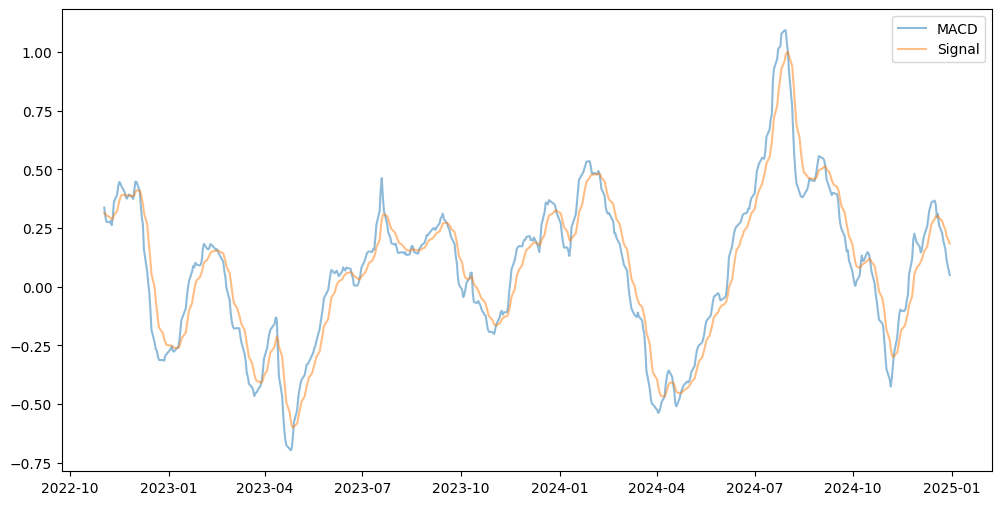

,Open,High,Low,Close,MovingA,SMA,Upper,Lower,Change,RSI,...,+DI,-DI,DX,ADX,%K,%SO,Fast,Slow,MACD,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-02 00:00:00-04:00,17.658486,17.818932,17.375347,17.375347,17.216755,0.395063,18.006882,16.426628,-0.471903,56.361190,...,31.655169,22.961074,15.918516,15.492544,51.807961,78.203481,17.308246,16.970884,0.337362,0.314639
2022-11-03 00:00:00-04:00,17.177153,17.243219,17.063897,17.167715,17.255292,0.360582,17.976455,16.534128,-0.207632,52.608663,...,30.372053,26.034016,7.690727,14.749513,38.719051,59.362332,17.286563,16.986522,0.300041,0.311368
2022-11-04 00:00:00-04:00,17.243217,17.422538,17.082771,17.299845,17.279925,0.350873,17.981672,16.578178,0.132130,54.676688,...,31.347359,24.882170,11.497855,14.439832,47.048368,45.858460,17.288612,17.011282,0.277330,0.303921
2022-11-07 00:00:00-05:00,17.224340,17.611297,17.224340,17.535793,17.327414,0.337025,18.001464,16.653365,0.235949,58.185690,...,32.219799,23.637058,15.365599,14.528000,61.922321,49.229913,17.326718,17.052526,0.274193,0.297537
2022-11-08 00:00:00-05:00,17.649049,17.884999,17.573545,17.686800,17.401695,0.290194,17.982082,16.821307,0.151007,60.303920,...,34.306511,22.559195,20.657996,15.111809,69.075522,59.348737,17.382213,17.102175,0.280038,0.293833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,23.050714,0.296225,23.643165,22.458264,0.050001,50.977659,...,25.235197,26.252182,1.975213,13.149469,37.500053,56.095703,22.952167,22.724218,0.227949,0.280981
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,23.068571,0.270076,23.608723,22.528420,-0.010000,50.836407,...,24.441408,25.426403,1.975213,12.085254,27.731118,36.327047,22.924142,22.727610,0.196532,0.264091
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,23.052857,0.287587,23.628031,22.477684,-0.130001,48.938028,...,23.921236,24.885268,1.975213,11.122393,16.806646,27.345939,22.880428,22.721120,0.159308,0.243135


In [36]:
#Fast EMA->12 days
#Slow EMA->26 days
#Signal Line->9 days

def MACD(data):
    data['Fast'] = data['Close'].ewm(span=12, min_periods=12).mean()
    data['Slow'] = data['Close'].ewm(span=26, min_periods=26).mean()
    data['MACD'] = data['Fast'] - data['Slow']
    data['Signal'] = data['MACD'].ewm(span=9, min_periods=9).mean()

    data.dropna(inplace=True)










    plt.figure(figsize=(12,6))
    plt.plot(data['MACD'], label='MACD', alpha=0.5)
    plt.plot(data['Signal'], label='Signal', alpha=0.5)
    plt.legend()
    plt.show()

    return data
MACD(data)





In [40]:
def vwap(data):
  data['Typical Price']=(data['High']+data['Low']+data['Close'])/3
  data['TPV']=data['Typical Price']*data['Volume']
  data['TPV_Sum']=data['TPV'].cumsum()
  data['Volume_Sum']=data['Volume'].cumsum()
  data['VWAP']=data['TPV_Sum']/data['Volume_Sum']
  return data

vwap(data)

,Open,High,Low,Close,Volume,Typical Price,TPV,TPV_Sum,Volume_Sum,VWAP
Date,,,,,,,,,,
2022-01-03 00:00:00-05:00,23.443215,23.581715,23.221617,23.323183,4526700,23.375505,1.058139e+08,1.058139e+08,4526700,23.375505
2022-01-04 00:00:00-05:00,23.313948,23.424747,23.064650,23.184683,8180900,23.224693,1.899989e+08,2.958128e+08,12707600,23.278415
2022-01-05 00:00:00-05:00,22.935389,23.009255,22.390627,22.436792,8881400,22.612225,2.008282e+08,4.966410e+08,21589000,23.004354
2022-01-06 00:00:00-05:00,22.344461,22.612225,22.132095,22.261362,11523300,22.335227,2.573755e+08,7.540165e+08,33112300,22.771494
2022-01-07 00:00:00-05:00,22.362927,22.501427,22.132095,22.344461,6596500,22.325995,1.472734e+08,9.012900e+08,39708800,22.697486
...,...,...,...,...,...,...,...,...,...,...
2024-12-23 00:00:00-05:00,22.730000,22.840000,22.510000,22.780001,3622600,22.710000,8.226925e+07,1.253618e+11,6882252300,18.215233
2024-12-24 00:00:00-05:00,22.580000,22.820000,22.549999,22.770000,2051600,22.713333,4.659867e+07,1.254084e+11,6884303900,18.216574
2024-12-26 00:00:00-05:00,22.639999,22.760000,22.600000,22.639999,3440300,22.666667,7.798013e+07,1.254864e+11,6887744200,18.218797
